In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#Read the csv file
file_path = ("../Resources/parkinsons_disease_data.csv")
park_df = pd.read_csv(file_path)
park_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [3]:
#dropping any rows with the missing values
park_df.dropna(axis=0, how='any')
park_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [4]:
park_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [5]:
#dropping unnecessary columns
park_df.drop(["DoctorInCharge", "PatientID"],axis = 1, inplace=True)


In [6]:
#removing duplicates
park_df.drop_duplicates()
park_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,...,29.181289,1.572427,1,0,0,0,0,0,0,0
1,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,...,12.332639,4.787551,0,1,0,1,0,1,0,1
2,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,...,29.927783,2.130686,1,0,0,0,1,0,1,1
3,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,...,21.304268,3.391288,1,1,1,0,0,0,1,1
4,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,...,8.336364,3.200969,0,0,0,1,0,1,0,0


In [7]:
#basic information and statistics.
park_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2105.0,69.601900,11.594511,50.000000,60.000000,70.000000,80.000000,89.000000
Gender,2105.0,0.492637,0.500065,0.000000,0.000000,0.000000,1.000000,1.000000
Ethnicity,2105.0,0.692637,1.003827,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2105.0,1.337292,0.895840,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2105.0,27.209493,7.208099,15.008333,20.782176,27.184571,33.462452,39.999887
Smoking,2105.0,0.296437,0.456795,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2105.0,10.040413,5.687014,0.002228,5.150278,10.070337,14.829565,19.988866
PhysicalActivity,2105.0,5.016674,2.890919,0.004157,2.455703,5.031550,7.512795,9.995255
DietQuality,2105.0,4.912901,2.872115,0.000011,2.478503,4.825187,7.381487,9.995864
SleepQuality,2105.0,6.996639,1.753065,4.000497,5.488864,6.929819,8.558719,9.999821


In [8]:
#calculating the average age
avg_age = round(park_df['Age'].mean(),2)
avg_age


69.6

Number of Smokers: 624
Number of Non-Smokers: 2105


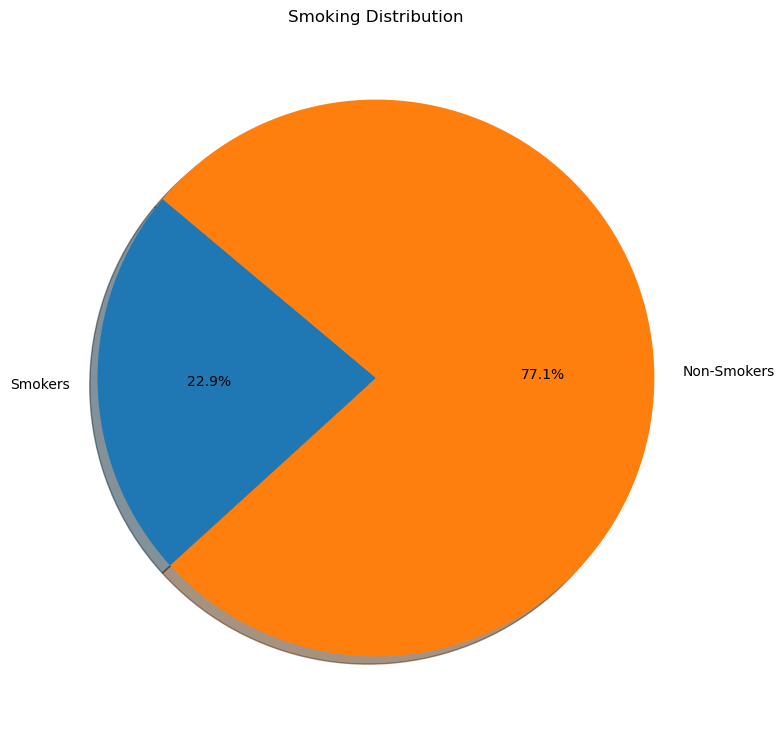

In [9]:
# Explicitly labeling smokers and non-smokers
num_smokers = park_df[park_df['Smoking'] == 1].shape[0]
num_non_smokers = park_df['Smoking'].shape[0]

print(f"Number of Smokers: {num_smokers}")
print(f"Number of Non-Smokers: {num_non_smokers}")

labels = ['Smokers', 'Non-Smokers']
sizes = [num_smokers, num_non_smokers]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Rotate to start from a better angle
    shadow=True  # Add a shadow for visual effect
)
plt.title('Smoking Distribution')
plt.tight_layout()

# Save and show the pie chart
plt.savefig('./Images/smoking_distribution_pie_chart.png')
plt.show()




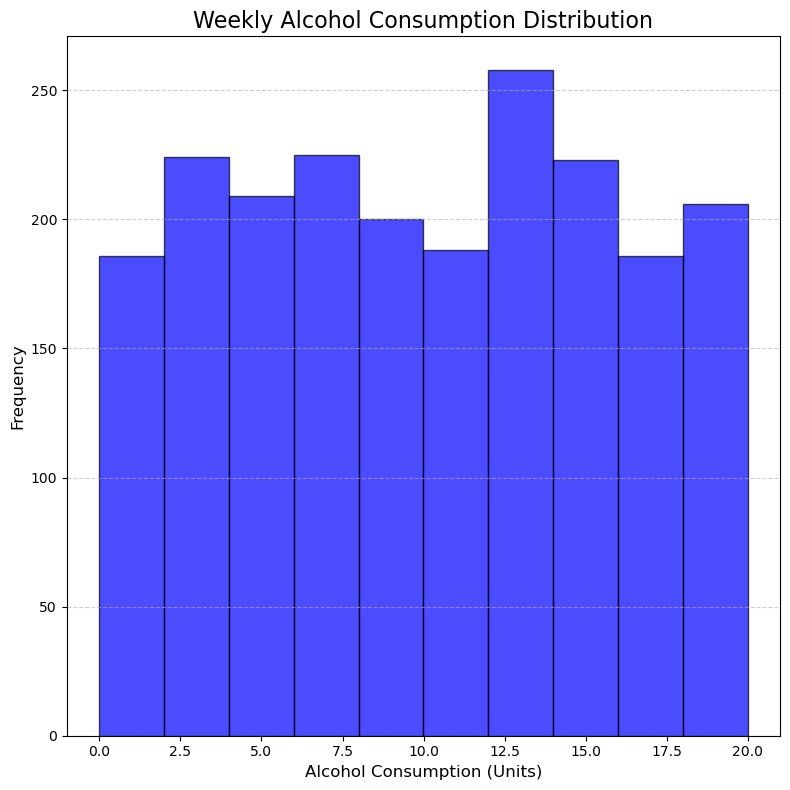

In [10]:

# Visulaisation of Alcohol Consumption: Weekly alcohol consumption in units, ranging from 0 to 20.
plt.figure(figsize=(8, 8))

# Plot the hist for AlcoholConsumption
plt.hist(
    park_df['AlcoholConsumption'],  # Column containing weekly alcohol consumption data
    bins=10,  # Divide the range into 10 equal intervals
    color='blue',  # Customizne the color of the bars
    edgecolor='black',  # Add edges to the bars for clarity
    alpha=0.7  # Make bars slightly transparent for aesthetics
)

# Add title and axis labels
plt.title('Weekly Alcohol Consumption Distribution', fontsize=16)
plt.xlabel('Alcohol Consumption (Units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save and show the plot
plt.tight_layout()
plt.savefig('./Images/alcohol_consumption_distribution.png')
plt.show()


In [11]:
#Count of patients based on gender
female = park_df[park_df['Gender'] == 1].shape[0]
male = park_df['Gender'].shape[0]
print(f"Number of Males: {male}")
print(f"Number of females: {female}")


Number of Males: 2105
Number of females: 1037


In [12]:
#avg BMi
avg_BMI = round(park_df['BMI'].mean(),2)
avg_BMI


27.21

## Symptom Analysis ##

In [13]:
#Tremor: Presence of tremor, where 0 indicates No and 1 indicates Yes.

tremor=park_df[park_df['Tremor']==1].shape[0]
non_tremor=park_df.shape[0] 
tremor_data = [
    {'Type': 'Tremor', 'Count': tremor},
    {'Type': 'No Tremor', 'Count': non_tremor}
    ]

tremor_data


[{'Type': 'Tremor', 'Count': 909}, {'Type': 'No Tremor', 'Count': 2105}]

In [14]:
# Rigidity: Presence of muscle rigidity, where 0 indicates No and 1 indicates Yes.
Rigidity =park_df[park_df['Rigidity']==1].shape[0]
non_Rigidity =park_df.shape[0]

print(f"Number of count with Rigidity symptom: {Rigidity}")
print(f"Number of count without Rigidity Symptom: {non_Rigidity}")



Number of count with Rigidity symptom: 532
Number of count without Rigidity Symptom: 2105


In [15]:
#Bradykinesia: Presence of bradykinesia (slowness of movement), where 0 indicates No and 1 indicates Yes
Bradyknesia=park_df[park_df['Rigidity']==1].shape[0]
non_bradykinesia =park_df.shape[0]

print(f"Number of count with bradykinesia symptom: {Bradyknesia}")
print(f"Number of count without bradykinesia Symptom: {non_bradykinesia}")


Number of count with bradykinesia symptom: 532
Number of count without bradykinesia Symptom: 2105


## Diagnosis analysis ##

In [16]:
#Diagnosis: Diagnosis status for Parkinson's Disease, where 0 indicates No and 1 indicates Yes.
diagnosis =park_df[park_df['Diagnosis']==1].shape[0]
non_diagnosis = park_df.shape[0]
Diagnosis_data = [
    {'Type': 'Diagnosis', 'Count': diagnosis},
    {'Type': 'Non Diagnosis', 'Count': non_diagnosis}
    ]
print(Diagnosis_data)


[{'Type': 'Diagnosis', 'Count': 1304}, {'Type': 'Non Diagnosis', 'Count': 2105}]


## Ethincity analysis ##

Ethnicity
0    1270
1     425
3     213
2     197
Name: count, dtype: int64
Ethnicity
0    60.332542
1    20.190024
3    10.118765
2     9.358670
Name: proportion, dtype: float64


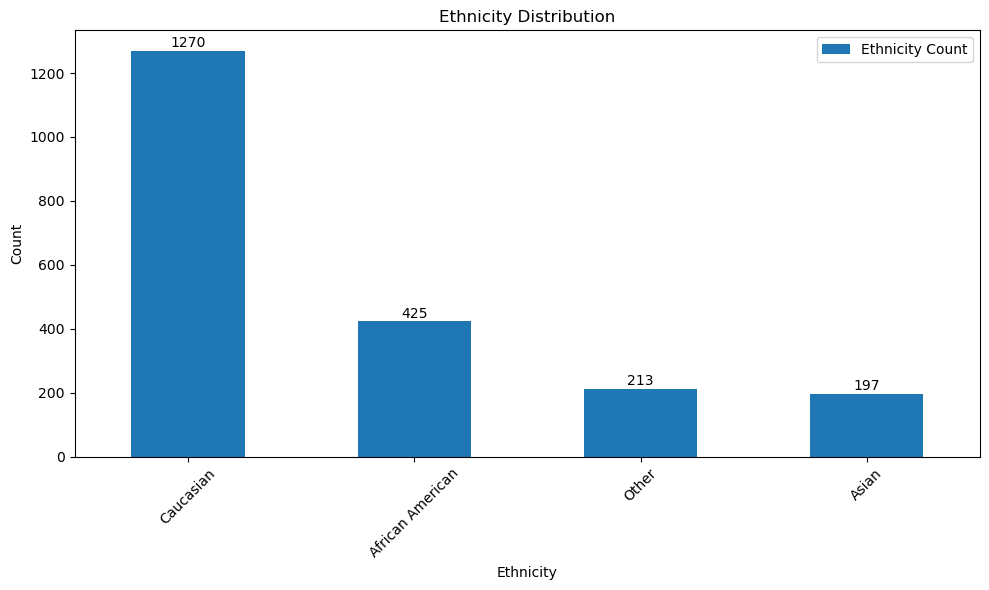

In [17]:
# Mapping for x-axis label
labels_mapping = {
    0: 'Caucasian',
    1: 'African American',
    2: 'Asian',
    3: 'Other'
}

# Basic Ethnicity distribution
ethnicity_counts = park_df['Ethnicity'].value_counts()
ethnicity_percentages = park_df['Ethnicity'].value_counts(normalize=True) * 100

print(ethnicity_counts)

print(ethnicity_percentages)

# Plot the graph
plt.figure(figsize=(10, 6))
ax = ethnicity_counts.plot(kind='bar', label='Ethnicity Count')

# Add labels to each bar
for i, count in enumerate(ethnicity_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

# Update x-axis labels using labels_mapping
new_labels = [labels_mapping.get(i, str(i)) for i in ethnicity_counts.index]
ax.set_xticklabels(new_labels, rotation=45)  

# Add title, axis labels, and legend
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.tight_layout()
plt.legend(loc='upper right')

#show the figure
plt.show()




## Cognitive and Functional Assessments ##


In [27]:
# Filter patients meeting all conditions
filtered_patients = park_df[
    (park_df["UPDRS"] > 100) & 
    (park_df["FunctionalAssessment"] < 5) & 
    (park_df["MoCA"] < 20)
]

results = filtered_patients[["UPDRS", "MoCA", "FunctionalAssessment"]]

# Display the result
print("Patients meeting all conditions:")
results



Patients meeting all conditions:


,UPDRS,MoCA,FunctionalAssessment
7,181.172565,11.065216,1.190611
8,178.261521,10.936604,3.438111
11,172.011909,5.645201,4.611534
13,142.121341,9.630378,4.062880
15,165.709398,19.616032,1.236369
...,...,...,...
2086,136.394375,5.330472,0.898147
2089,129.624071,14.203152,2.846496
2090,117.411196,6.035420,0.810232
2094,104.033289,10.887978,0.449311


## Medical History Analysis ##

In [19]:
# Basic data exploration
print("Dataset Overview:")
print(park_df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   Ethnicity                 2105 non-null   int64  
 3   EducationLevel            2105 non-null   int64  
 4   BMI                       2105 non-null   float64
 5   Smoking                   2105 non-null   int64  
 6   AlcoholConsumption        2105 non-null   float64
 7   PhysicalActivity          2105 non-null   float64
 8   DietQuality               2105 non-null   float64
 9   SleepQuality              2105 non-null   float64
 10  FamilyHistoryParkinsons   2105 non-null   int64  
 11  TraumaticBrainInjury      2105 non-null   int64  
 12  Hypertension              2105 non-null   int64  
 13  Diabetes                  2105 non-null   int

In [20]:
# Count of patients with each condition
print("\nCondition Prevalence:")
medical_columns = [
    'FamilyHistoryParkinsons', 'TraumaticBrainInjury', 
    'Hypertension', 'Diabetes', 'Depression', 'Stroke'
]

for column in medical_columns:
    count = park_df[column].sum()
    percentage = (count / len(park_df)) * 100
    print(f"{column}: {count} patients ({percentage:.2f}%)")





Condition Prevalence:
FamilyHistoryParkinsons: 307 patients (14.58%)
TraumaticBrainInjury: 224 patients (10.64%)
Hypertension: 307 patients (14.58%)
Diabetes: 312 patients (14.82%)
Depression: 432 patients (20.52%)
Stroke: 103 patients (4.89%)


In [21]:
# Identify patients with multiple conditions
def count_conditions(row):
    return row[medical_columns].sum()

park_df['Total_Conditions'] = park_df.apply(count_conditions, axis=1)
print("\nPatients by Number of Conditions:")
print(park_df['Total_Conditions'].value_counts().sort_index())



Patients by Number of Conditions:
Total_Conditions
0.0    882
1.0    841
2.0    314
3.0     56
4.0     12
Name: count, dtype: int64


In [22]:
# Correlation between conditions
print("\nCondition Correlations:")
correlation_matrix = park_df[medical_columns].corr()
correlation_matrix



Condition Correlations:


,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke
FamilyHistoryParkinsons,1.000000,0.036364,-0.018205,0.005670,-0.006680,0.018582
TraumaticBrainInjury,0.036364,1.000000,-0.011649,-0.013879,0.038258,-0.014001
Hypertension,-0.018205,-0.011649,1.000000,0.001882,-0.040007,0.012342
Diabetes,0.005670,-0.013879,0.001882,1.000000,0.029694,0.010744
Depression,-0.006680,0.038258,-0.040007,0.029694,1.000000,-0.017112
Stroke,0.018582,-0.014001,0.012342,0.010744,-0.017112,1.000000


In [23]:
# Filter patients with specific condition combinations
def filter_patients(df, conditions):
    mask = np.ones(len(df), dtype=bool)
    for condition in conditions:
        mask &= df[condition] == 1
    return df[mask]

# Example: Patients with both Parkinson's family history and hypertension
parkinsons_hypertension_patients = filter_patients(park_df, 
    ['FamilyHistoryParkinsons', 'Hypertension'])
print("\nPatients with Parkinson's Family History and Hypertension:")
parkinsons_hypertension_patients.head()


Patients with Parkinson's Family History and Hypertension:


,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,Total_Conditions
66,58,1,0,2,17.497276,1,4.128080,6.518569,7.675491,6.547011,...,3.127578,1,0,0,0,0,0,0,1,4.0
106,56,0,3,1,16.472097,1,8.845307,3.754913,3.463191,6.602524,...,9.282444,0,0,0,0,1,0,0,0,2.0
174,85,1,0,1,33.372641,1,3.619158,7.377163,3.710211,8.830694,...,4.745914,1,0,0,0,0,0,0,1,2.0
195,50,0,3,2,35.088643,0,11.929395,0.555411,7.577986,4.944417,...,1.752420,0,0,1,0,1,1,1,1,3.0
218,65,1,0,1,25.559860,0,16.447904,1.240633,0.389642,6.638832,...,0.173055,0,1,0,0,0,1,1,1,2.0


## Clinical Measurements Analysis ##

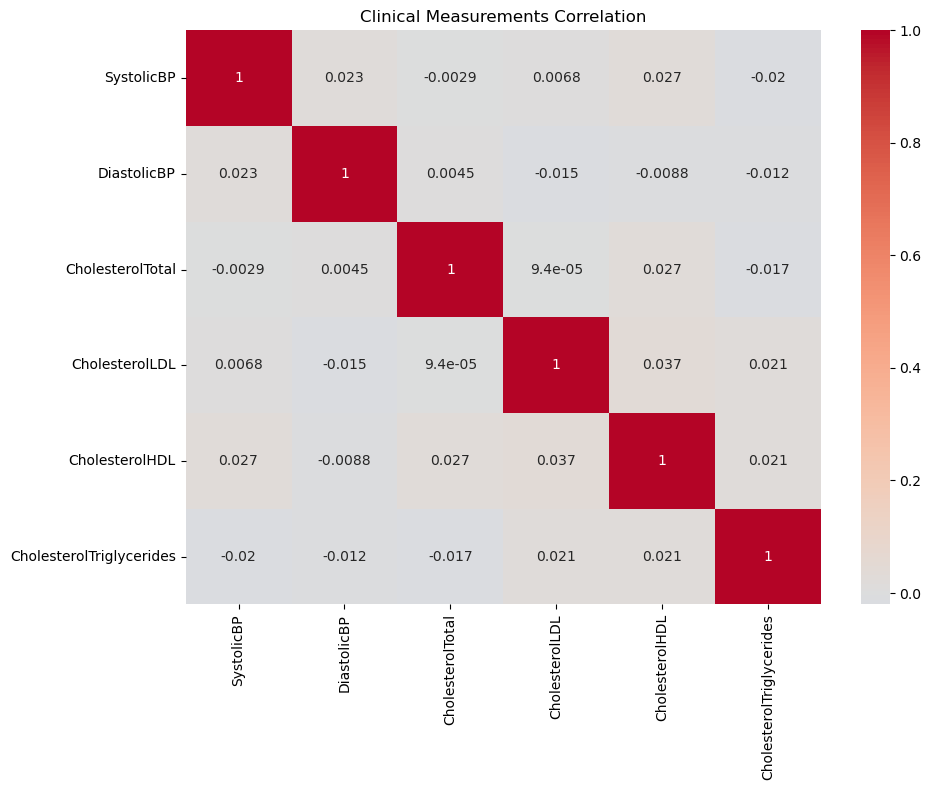

<Figure size 640x480 with 0 Axes>

In [28]:
# Verify columns exist in park_df
clinical_columns = [
    'SystolicBP', 'DiastolicBP', 
    'CholesterolTotal', 'CholesterolLDL', 
    'CholesterolHDL', 'CholesterolTriglycerides'
]

# Basic data validation
def validate_clinical_data(df, columns):
    """
    Validate clinical measurement columns
    """
    # Check for missing columns
    missing_cols = [col for col in columns if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns: {missing_cols}")
    
    # Check data types and ranges
    for col in columns:
        # Ensure numeric type
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Range checks based on given specifications
        range_checks = {
            'SystolicBP': (90, 180),
            'DiastolicBP': (60, 120),
            'CholesterolTotal': (150, 300),
            'CholesterolLDL': (50, 200),
            'CholesterolHDL': (20, 100),
            'CholesterolTriglycerides': (50, 400)
        }
        
        # Check and flag out-of-range values
        min_val, max_val = range_checks[col]
        out_of_range = df[(df[col] < min_val) | (df[col] > max_val)]
        if not out_of_range.empty:
            print(f"Warning: {col} has {len(out_of_range)} out-of-range values")
    
    return df

# Validate and prepare data
try:
    park_df = validate_clinical_data(park_df, clinical_columns)
except Exception as e:
    print(f"Data validation error: {e}")
    raise

# Analysis functions
def analyze_clinical_measurements(df):
    # Descriptive statistics
    desc_stats = df[clinical_columns].describe()
    
    # Correlation matrix
    correlation_matrix = df[clinical_columns].corr()
    
# Visualization: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Clinical Measurements Correlation')
plt.tight_layout()
plt.show()
plt.savefig('./Images/Clinical Measurements Correlation.png')



In [25]:
# Correlation matrix
correlation_matrix = park_df[clinical_columns].corr()
correlation_matrix

,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides
SystolicBP,1.000000,0.022928,-0.002874,0.006790,0.027366,-0.020193
DiastolicBP,0.022928,1.000000,0.004478,-0.014595,-0.008830,-0.011899
CholesterolTotal,-0.002874,0.004478,1.000000,0.000094,0.026569,-0.017274
CholesterolLDL,0.006790,-0.014595,0.000094,1.000000,0.036736,0.020995
CholesterolHDL,0.027366,-0.008830,0.026569,0.036736,1.000000,0.020501
CholesterolTriglycerides,-0.020193,-0.011899,-0.017274,0.020995,0.020501,1.000000


In [26]:
# Risk categorization
def check_blood_pressure(systolic, diastolic):
    """
    Simple function to check blood pressure category
    Input: systolic and diastolic numbers
    Output: returns the blood pressure category
    """
    # Normal BP
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    
    # Elevated BP
    if 120 <= systolic < 130 and diastolic < 80:
        return 'Elevated'
        
    # High BP
    if systolic >= 130 or diastolic >= 80:
        return 'High Blood Pressure'
    
    return 'Unknown'

def check_cholesterol(total_chol, ldl_chol):
    """
    Simple function to check cholesterol levels
    Input: total cholesterol and LDL cholesterol numbers
    Output: returns cholesterol status
    """
    result = []
    
    # Check total cholesterol
    if total_chol < 200:
        result.append('Total Cholesterol: Good')
    elif total_chol < 240:
        result.append('Total Cholesterol: Borderline')
    else:
        result.append('Total Cholesterol: High')
    
    # Check LDL cholesterol
    if ldl_chol < 100:
        result.append('LDL: Good')
    elif ldl_chol < 130:
        result.append('LDL: Borderline')
    else:
        result.append('LDL: High')
    
    return ' | '.join(result)

def analyze_health_data(data):
    """
    Main function to analyze patient health data
    Input: dataframe with health measurements
    Output: dictionary with analysis results
    """
# copy of data to avoid changing the original
df = data.copy()
    
# Add blood pressure categories
    df['BP_Category'] = df.apply(lambda row: check_blood_pressure(
        row['SystolicBP'], 
        row['DiastolicBP']
    ), axis=1)
    
 #cholesterol categories
    df['Cholesterol_Status'] = df.apply(lambda row: check_cholesterol(
        row['CholesterolTotal'],
        row['CholesterolLDL']
    ), axis=1)
    
    #basic statistics
    basic_stats = df[[
        'SystolicBP', 
        'DiastolicBP', 
        'CholesterolTotal', 
        'CholesterolLDL'
    ]].describe()
    
#Count how many patients in each category
bp_counts = df['BP_Category'].value_counts()
chol_counts = df['Cholesterol_Status'].value_counts()
    
# Calculate percentages
total_patients = len(df)
bp_percentages = (bp_counts / total_patients * 100).round(1)
    
#Prepare results
results = {
        'statistics': basic_stats,
        'bp_category_counts': bp_counts,
        'bp_percentages': bp_percentages,
        'cholesterol_counts': chol_counts,
        'processed_data': df
}

    
return results


#run the analysis:
results = analyze_health_data(park_df)

# To see the results:
print("Basic Statistics:")
print(results['statistics'])

print("\nBlood Pressure Categories:")
print(results['bp_category_counts'])

print("\nPercentages in each BP category:")
print(results['bp_percentages'])

print("\nCholesterol Categories:")
print(results['cholesterol_counts'])


Basic Statistics:
        SystolicBP  DiastolicBP  CholesterolTotal  CholesterolLDL
count  2105.000000  2105.000000       2105.000000     2105.000000
mean    133.719715    90.249881        226.860840      126.147858
std      26.502355    17.061488         43.589406       43.407036
min      90.000000    60.000000        150.062698       50.022828
25%     110.000000    75.000000        189.385178       88.841960
50%     133.000000    91.000000        228.528256      126.884570
75%     157.000000   105.000000        264.608100      163.912782
max     179.000000   119.000000        299.963074      199.985981

Blood Pressure Categories:
BP_Category
High Blood Pressure    1783
Normal                  243
Elevated                 79
Name: count, dtype: int64

Percentages in each BP category:
BP_Category
High Blood Pressure    84.7
Normal                 11.5
Elevated                3.8
Name: count, dtype: float64

Cholesterol Categories:
Cholesterol_Status
Total Cholesterol: High | LDL: High 